# Multi-variable linear regression

The multivariable linear regression analysis is used to create a model of a single variable, typically an energy consumption. We call this the *dependent* variable.  The model is constructed as a linear combination of *explanatory* variables, like weather measurements or occupation. More information can be found on <a href="https://en.wikipedia.org/wiki/Linear_regression" target="_blank">wikipedia</a>.


The model is static.  This means that the data set should not contain dynamic effects.  For buildings, dynamic effects are mostly neglegible on a weekly basis unless the building has a very high thermal inertia.

Typical use of this analysis is to create a model of eg. the gas consumption of a building, and then use this model to detect and quantify changes in the gas consumption.  For example, the savings resulting from a new gas boiler can be computed as the difference between the consumption predicted by the model and the actual consumption. 


### Imports and loading data

In [1]:
import opengrid as og
import pandas as pd
plt = og.plot_style()

In [2]:
df = og.datasets.get('gas_2016_hour')
# for this demo, we only compute a model for the sensor 313b
df = df[['313b']]
# load weather
dfw = og.datasets.get('weather_2016_hour')

### Compute degree-days

First we compute heating degree-days for different base temperatures. More information on the computation of degree-days can be found in [this demo](https://opengridcc.github.io/analysis/degree-days).

In [3]:
%matplotlib inline

In [4]:
# resample weather data to daily values and compute degree-days
dfw = dfw.resample('D').mean()
dfw_HDD = og.library.weather.compute_degree_days(ts=dfw['temperature'],
                                                  heating_base_temperatures=range(8, 18, 2),
                                                  cooling_base_temperatures=range(16, 26, 2)).bfill()

In [5]:
# resample the gas consumption to daily values and add the weather data and the degree-days
df_day = df.resample('D').sum()/1000. # kWh/day
df_day = pd.concat([df_day, dfw, dfw_HDD], axis=1).loc['2016']

# Create a monthly model for the gas consumption 

In [6]:
# resample to monthly data and plot 
df_month = df_day.resample('MS').sum()

In [7]:
# create the model
mvlr = og.MultiVarLinReg(df_month, endog='313b')

                            OLS Regression Results                            
Dep. Variable:              Q('313b')   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     727.3
Date:                Thu, 18 Jan 2018   Prob (F-statistic):           1.14e-10
Time:                        11:04:54   Log-Likelihood:                -75.275
No. Observations:                  12   AIC:                             154.5
Df Residuals:                      10   BIC:                             155.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     114.4892     62.260      1.839      

/usr/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))
/home/roel/work/opengrid/code/og/opengrid/library/regression.py:394: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dfmodel.sort_index(inplace=True)


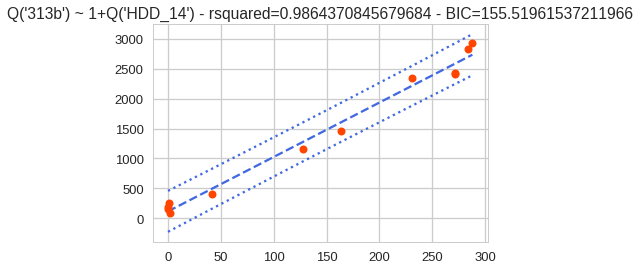

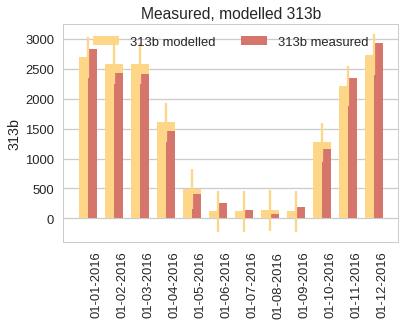

In [8]:
print(mvlr.fit.summary())
mvlr.plot()